# Time series models:

Time series models are mathematical tools used to analyze and predict data points collected over time. They explore patterns and trends in the data, allowing us to make informed decisions about future outcomes. These models account for the sequential nature of the data, capturing dependencies between observations to generate forecasts. They're widely used in various fields such as finance, economics, engineering, and environmental science to understand and anticipate changes over time.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
df = pd.read_csv('/content/cleaned_gold_price.csv', date_parser=['Date'])

In [ ]:
df.head()

,Date,Price
0,1950-01-31,34.73
1,1950-02-28,34.73
2,1950-03-31,34.73
3,1950-04-30,34.73
4,1950-05-31,34.73


In [ ]:
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d')

In [ ]:
df = df[df.Date.dt.year >= 1975]

In [ ]:
df.Price = np.log(df.Price)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 300 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    547 non-null    datetime64[ns]
 1   Price   547 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


<Axes: xlabel='Date'>

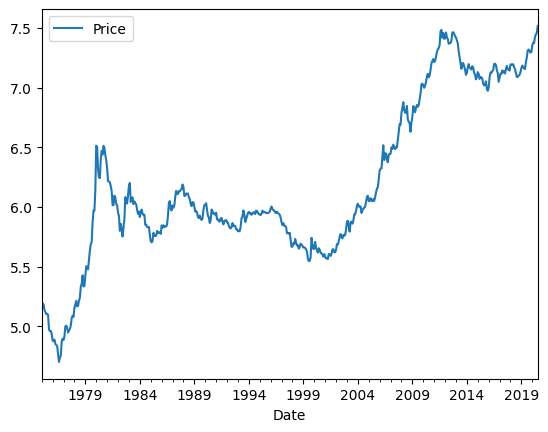

In [ ]:
df.plot('Date', 'Price')

In [ ]:
# Train test split ( 9:1 )

train_size = int(df.shape[0]*0.9)
train_size

492

<Axes: xlabel='Date'>

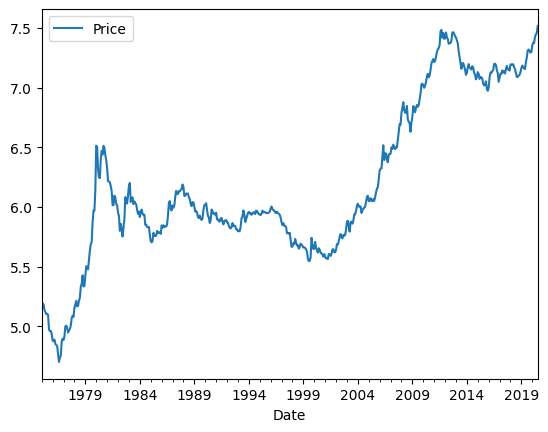

In [ ]:
df.plot('Date', 'Price')

In time series we split only in train and test. Here the validation set is not considered. Validation set is used to train the model than validate the model.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def evaluate_model(true, predicted):
  '''
  Inputs true value and predicted value and returns a dictionary which contains
  mean absolute error, mean squared error, root mean squared error and mean absolute percentage error'''
  true = np.exp(true)
  predicted = np.exp(predicted)
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  mape = round((np.mean(abs(true - predicted) / true))* 100, 2)
  to_return = {
      'mae': mae,
      'mse': mse,
      'rmse': rmse,
      'mape': mape
  }
  return to_return

In [ ]:
def append_model_results(df, model_name, metrics):
    '''
    Append the results of a model to the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame to append results to.
    model_name (str): The name of the model.
    metrics (dict): A dictionary containing the metrics (mae, mse, rmse, mape).
    '''

    # Create a dictionary with all the information
    data = {
        'name_of_model': model_name,
        'mae': metrics.get('mae', None),
        'mse': metrics.get('mse', None),
        'rmse': metrics.get('rmse', None),
        'mape': metrics.get('mape', None)
    }

    # Create a DataFrame with the data to append
    new_row_df = pd.DataFrame([data])

    # Concatenate the existing DataFrame with the new row DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)

    return df

# Define the columns for the DataFrame
columns = ['name_of_model', 'mae', 'mse', 'rmse', 'mape']

final_results_df = pd.DataFrame(columns=columns)

In [ ]:
final_results_df

,name_of_model,mae,mse,rmse,mape


In [ ]:
# del final_results_df

# Naive / Persistence Model:

The naive or persistence model is a simple time series forecasting approach where the next value is predicted to be the same as the previous value. It assumes that future values will follow the same pattern as the most recent observation.

In [ ]:
df_naive = df.copy()

In [ ]:
df_naive.head()

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470
302,1975-03-31,5.182923
303,1975-04-30,5.136187
304,1975-05-31,5.119747


In [ ]:
df_naive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 300 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    547 non-null    datetime64[ns]
 1   Price   547 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [ ]:
df_naive['lag1'] = df_naive.Price.shift(1)

In [ ]:
# Splitting the dataset into train and test dataset
df_naive_train, df_naive_test = df_naive[1: train_size], df_naive[train_size:]

In [ ]:
df_naive_train.shape, df_naive_test.shape

((491, 3), (55, 3))

In [ ]:
train_x, train_y = df_naive_train['lag1'], df_naive_train['Price']
test_x, test_y = df_naive_test['lag1'], df_naive_test['Price']

`lag1` value is the last month price. This is the predicted price for next month and `Price` is the actual value.

In [ ]:
predictions = test_x.copy()

`lag1` values are the predicted values. `Price` is the actual value

In [ ]:
naive_metrics = evaluate_model(test_y, predictions)
naive_metrics

{'mae': 33.06178181818186,
 'mse': 1815.1994063272746,
 'rmse': 42.60515703911059,
 'mape': 2.45}

In [ ]:
final_results_df

,name_of_model,mae,mse,rmse,mape


In [ ]:
final_results_df = append_model_results(final_results_df, 'Naive model with log P from 1975', naive_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45


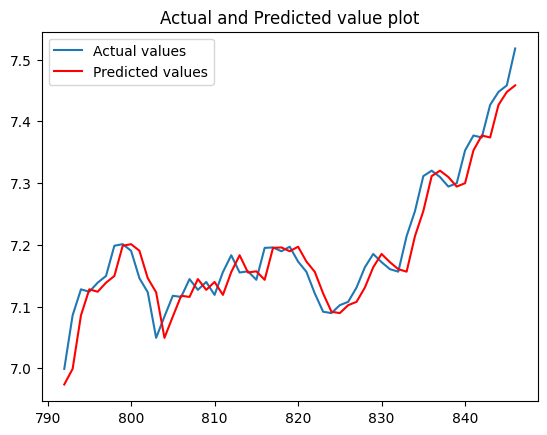

In [ ]:
test_y.plot()
predictions.plot( color='red')
plt.legend([ 'Actual values', 'Predicted values'])
plt.title('Actual and Predicted value plot')
plt.show()

In [ ]:
def naive_model(df, var_col):
  '''
  Inputs the dataframe as df and var_col is the series which contains the target value and plots graphs with actual and predicted and prints the evaluation metric values
  '''
  df_naive = df.copy()

  # Create lagged series
  df_naive['lag1'] = df_naive[var_col].shift(1)

  # Define the size for the training set
  train_size = int(len(df_naive) * 0.9)  # Example: 90% train, 10% test

  # Split into train and test sets
  df_naive_train = df_naive.iloc[1:train_size]  # Starting from 1 to skip the NaN value
  df_naive_test = df_naive.iloc[train_size:]

  # Separate features and target variables
  train_x, train_y = df_naive_train['lag1'], df_naive_train[var_col]
  test_x, test_y = df_naive_test['lag1'], df_naive_test[var_col]

  # Use lagged values as predictions for the naive model
  predictions = test_x.copy()

  # Evaluate the model performance
  output = evaluate_model(test_y, predictions)

  test_y.plot()
  predictions.plot( color='red')

  display(output)


{'mae': 33.06178181818186,
 'mse': 1815.1994063272746,
 'rmse': 42.60515703911059,
 'mape': 2.45}

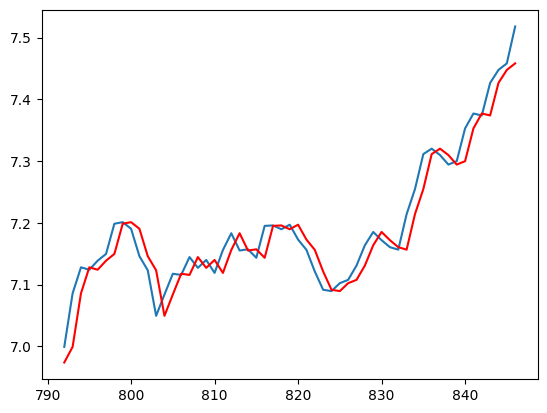

In [ ]:
naive_model(df, 'Price')

In [ ]:
print(f'Forecasted values for upcoming months using naive forecast is {df.Price[-1:].values[0]}')

Forecasted values for upcoming months using naive forecast is 7.517959341408407


# Simple Moving Average (SMA) Model:

The Simple Moving Average Model calculates the mean of the previous 'n' values to predict the next value.

In [ ]:
df_sma = df.copy()

In [ ]:
df_sma.head()

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470
302,1975-03-31,5.182923
303,1975-04-30,5.136187
304,1975-05-31,5.119747


In [ ]:
df_sma['SMA_5'] = df_sma.Price.rolling(window=5).mean()

In [ ]:
df_sma.head()

,Date,Price,SMA_5
300,1975-01-31,5.175381,NaN
301,1975-02-28,5.190470,NaN
302,1975-03-31,5.182923,NaN
303,1975-04-30,5.136187,NaN
304,1975-05-31,5.119747,5.160942


In [ ]:
df_sma.dropna(inplace=True)

In [ ]:
df_sma.head()

,Date,Price,SMA_5
304,1975-05-31,5.119747,5.160942
305,1975-06-30,5.101390,5.146143
306,1975-07-31,5.105139,5.129077
307,1975-08-31,5.094780,5.111448
308,1975-09-30,4.971971,5.078605


In [ ]:
df_sma_train, df_sma_test = df_sma[:train_size], df_sma[train_size:]

In [ ]:
df_sma_train.shape, df_sma_test.shape

((492, 3), (51, 3))

In [ ]:
train_x, train_y = df_sma_train['SMA_5'], df_sma_train['Price']
test_x, test_y = df_sma_test['SMA_5'], df_sma_test['Price']

In [ ]:
prediction_sma = test_x.copy()

In [ ]:
prediction_sma.shape

(51,)

In [ ]:
sma_metrics = evaluate_model(test_y, prediction_sma)
sma_metrics

{'mae': 44.21120357601624,
 'mse': 2998.5244221083076,
 'rmse': 54.758783972147405,
 'mape': 3.19}

In [ ]:
final_results_df = append_model_results(final_results_df, 'SMA model with log P w5 from 1975', sma_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19


for window = 5 (41.03745185185186, 50.74686540044971, 0.8790470433942955, 3.1)

for window = 10 (56.48918918918916, 70.1810695820514, 0.787195523602698, 4.22)

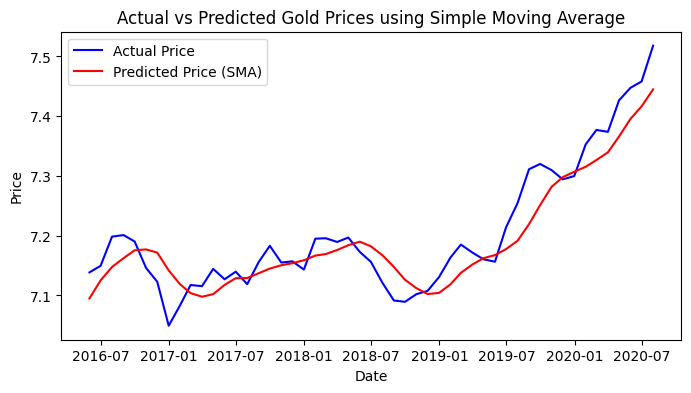

In [ ]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 4))
plt.plot(df_sma_test['Date'], test_y, label='Actual Price', color='blue')
plt.plot(df_sma_test['Date'], prediction_sma, label='Predicted Price (SMA)', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Gold Prices using Simple Moving Average')
plt.legend()
plt.show()


In [ ]:
# Function to compute SMA and evaluate
def evaluate_sma(df, target_col='Price', window_size=5, train_size=0.9):
    df_sma = df.copy()
    df_sma[f'SMA_{window_size}'] = df_sma[target_col].rolling(window=window_size).mean()
    df_sma = df_sma.dropna()  # Drop rows where SMA could not be computed

    train_size = int(len(df_sma) * train_size)
    df_sma_train, df_sma_test = df_sma[:train_size], df_sma[train_size:]

    train_x, train_y = df_sma_train[f'SMA_{window_size}'], df_sma_train[target_col]
    test_x, test_y = df_sma_test[f'SMA_{window_size}'], df_sma_test[target_col]

    prediction_sma = test_x.copy()  # SMA values are the predictions

    return evaluate_model(test_y, prediction_sma)

# Define different window sizes to evaluate
window_sizes = [30, 90, 180, 365]  # Example window sizes for daily data

# Evaluate each window size
results = {}
for window_size in window_sizes:
    results[window_size] = evaluate_sma(df,'Price',  window_size, 0.9)

# Print the results
for window_size, metrics in results.items():
    print(f"Window Size: {window_size}, Metrics: {metrics}")



Window Size: 30, Metrics: {'mae': 105.06797505386992, 'mse': 20688.79541718837, 'rmse': 143.8360018117452, 'mape': 7.18}
Window Size: 90, Metrics: {'mae': 132.30675012199487, 'mse': 31406.747059985035, 'rmse': 177.21948837524906, 'mape': 9.16}
Window Size: 180, Metrics: {'mae': 389.8665082270449, 'mse': 164603.38886439885, 'rmse': 405.7134319496938, 'mape': 27.65}
Window Size: 365, Metrics: {'mae': 900.7577711407639, 'mse': 834402.6998526045, 'rmse': 913.4564575570116, 'mape': 59.8}


# Linear Regression & XGBoost Model:

Linear regression in time series analysis is often used to model the relationship between an independent variable (or variables) and a dependent variable over time.

In [ ]:
df_lr = df.copy()

In [ ]:
df_lr.head(1)

,Date,Price
300,1975-01-31,5.175381


In [ ]:
# Created some features
lag_window = 6  # Specify the lag window
for i in range(1, lag_window + 1):
    df_lr[f'Price_Lag_{i}'] = df_lr['Price'].shift(i)

df_lr['Date'] = pd.to_datetime(df_lr['Date'])
df_lr['year'] = df_lr['Date'].dt.year
df_lr['month'] = df_lr['Date'].dt.month
df_lr['day'] = df_lr['Date'].dt.day
df_lr['day_of_week'] = df_lr['Date'].dt.dayofweek
df_lr['is_month_start'] = df_lr['Date'].dt.is_month_start.astype(int)
df_lr['is_month_end'] = df_lr['Date'].dt.is_month_end.astype(int)

In [ ]:
df_lr.head(1)

,Date,Price,Price_Lag_1,Price_Lag_2,Price_Lag_3,Price_Lag_4,Price_Lag_5,Price_Lag_6,year,month,day,day_of_week,is_month_start,is_month_end
300,1975-01-31,5.175381,NaN,NaN,NaN,NaN,NaN,NaN,1975,1,31,4,0,1


In [ ]:
df_lr.dropna(inplace=True)

In [ ]:
train_lr, test_lr = df_lr[:train_size], df_lr[train_size:]

In [ ]:
train_x, train_y = train_lr.drop(columns=['Date', 'Price']), train_lr['Price']
test_x, test_y = test_lr.drop(columns=['Date', 'Price']), test_lr['Price']

In [ ]:
display(train_lr.head(1))
display(test_lr.head(1))

,Date,Price,Price_Lag_1,Price_Lag_2,Price_Lag_3,Price_Lag_4,Price_Lag_5,Price_Lag_6,year,month,day,day_of_week,is_month_start,is_month_end
306,1975-07-31,5.105139,5.10139,5.119747,5.136187,5.182923,5.19047,5.175381,1975,7,31,3,0,1


,Date,Price,Price_Lag_1,Price_Lag_2,Price_Lag_3,Price_Lag_4,Price_Lag_5,Price_Lag_6,year,month,day,day_of_week,is_month_start,is_month_end
798,2016-07-31,7.198504,7.149587,7.138673,7.124037,7.127944,7.085812,6.999108,2016,7,31,6,0,1


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((492, 12), (492,), (49, 12), (49,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression()

In [ ]:
lr_predicts = lr_model.predict(test_x)

In [ ]:
lr_predicts.shape

(49,)

In [ ]:
test_y.shape

(49,)

In [ ]:
lr_metrics = evaluate_model(test_y, lr_predicts)
lr_metrics

{'mae': 32.850608804518004,
 'mse': 1746.069655031453,
 'rmse': 41.785998313208374,
 'mape': 2.43}

In [ ]:
final_results_df = append_model_results(final_results_df, 'LR model with log P from 1975', lr_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
params = {
    'LinearRegression': {
        "fit_intercept": [True, False],
        "copy_X": [True, False],
        "n_jobs": [-1, 1, None]
    },
    'XGBRegressor': {
        "learning_rate": [0.1, 0.01, 0.05, 0.001],
        "n_estimators": [8, 16, 32, 64, 128, 256]
    }
}

In [ ]:
# Linear regression for forecast ( for test x )
def lr_model_forecast(df,target_col='Price', date_col='Date', lag_window_size=6, number_of_days_forecast=15, model='LinearRegression', fine_tune=False):
    '''
    Inputs the dataframe as df,
    target column in dataframe as target_col,
    date column in dataframe as date_col,
    model can be selected LinearRegression,
    fine tuneed model parameter if fine_tune is True,
    number of lag window size as lag_window_size and number of forecast days as number_of_days_forecast and returns the pandas dataframe with date and forecasted values
    '''
    df_lr = df.copy()
    lag_window = lag_window_size  # Specify the lag window
    for i in range(1, lag_window + 1):
        df_lr[f'{target_col}_Lag_{i}'] = df_lr[target_col].shift(i)

    df_lr[date_col] = pd.to_datetime(df_lr[date_col])
    df_lr['year'] = df_lr[date_col].dt.year
    df_lr['month'] = df_lr[date_col].dt.month
    df_lr['day'] = df_lr[date_col].dt.day
    df_lr['day_of_week'] = df_lr[date_col].dt.dayofweek
    df_lr['is_month_start'] = df_lr[date_col].dt.is_month_start.astype(int)
    df_lr['is_month_end'] = df_lr[date_col].dt.is_month_end.astype(int)

    # Drop rows with NaN values resulting from the lag features
    df_lr.dropna(inplace=True)

    # Split the data into training and testing sets (90% train, 10% test)
    train_size = int(0.9 * len(df))
    train_lr, test_lr = df_lr[:train_size], df_lr[train_size:]

    # Prepare training and testing data
    train_x = train_lr.drop(columns=[date_col, target_col])
    train_y = train_lr[target_col]
    test_x = test_lr.drop(columns=[date_col, target_col])
    test_y = test_lr[target_col]

    # Train the linear regression model
    try:
      lr_model = eval(f'{model}()')
      if fine_tune:
        print('finetuning......')
        param = params[model]
        rs = RandomizedSearchCV(lr_model, param)
        rs.fit(train_x, train_y)
        lr_model.set_params(**rs.best_params_)
        # print(rs.best_params_)
      else:
        pass
    except NameError:
      raise "Please choose from these [LinearRegression, XGBRegressor]"
    lr_model.fit(train_x, train_y)

    forecast_prices = []

    last_date = pd.to_datetime(train_lr[date_col].max())

    forecast_prices = lr_model.predict(test_x)

    # Generate dates for the next months
    forecast_dates = [last_date + relativedelta(months=i) for i in range(1, len(test_x) + 1)]

    # Create a dataframe with the forecasted dates and prices
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_prices})

    return forecast_df


In [ ]:
# to forecast beyond test x
def lr_model_forecast_beyond(df,target_col='Price', date_col='Date',test_size=0.1, lag_window_size=6, number_of_days_forecast=15, model='LinearRegression', fine_tune=False):
    '''
    Inputs the dataframe as df,
    target column in dataframe as target_col,
    date column in dataframe as date_col,
    number of lag window size as lag_window_size and number of forecast days as number_of_days_forecast and returns the pandas dataframe with date and forecasted values
    '''
    df_lr = df.copy()
    lag_window = lag_window_size  # Specify the lag window
    for i in range(1, lag_window + 1):
        df_lr[f'{target_col}_Lag_{i}'] = df_lr[target_col].shift(i)

    df_lr[date_col] = pd.to_datetime(df_lr[date_col])
    df_lr['year'] = df_lr[date_col].dt.year
    df_lr['month'] = df_lr[date_col].dt.month
    df_lr['day'] = df_lr[date_col].dt.day
    df_lr['day_of_week'] = df_lr[date_col].dt.dayofweek
    df_lr['is_month_start'] = df_lr[date_col].dt.is_month_start.astype(int)
    df_lr['is_month_end'] = df_lr[date_col].dt.is_month_end.astype(int)

    # Drop rows with NaN values resulting from the lag features
    df_lr.dropna(inplace=True)
    train_size  = 1 - test_size
    # Split the data into training and testing sets (90% train, 10% test)
    train_size = int(train_size * len(df_lr))
    train_lr, test_lr = df_lr[:train_size], df_lr[train_size:]

    # Prepare training and testing data
    train_x = train_lr.drop(columns=[date_col, target_col])
    train_y = train_lr[target_col]
    test_x = test_lr.drop(columns=[date_col, target_col])
    test_y = test_lr[target_col]

    # Train the linear regression model
    try:
      lr_model = eval(f'{model}()')
      if fine_tune:
        print('finetuning......')
        param = params[model]
        rs = RandomizedSearchCV(lr_model, param)
        rs.fit(train_x, train_y)
        lr_model.set_params(**rs.best_params_)
        # print(rs.best_params_)
      else:
        pass
    except NameError:
      raise "Please choose from these [LinearRegression, XGBRegressor]"
    lr_model.fit(train_x, train_y)

    # Initialize the last known values
    last_known_values = df_lr.tail(lag_window)[target_col].values.tolist()
    # display(last_known_values)
    forecast_prices = []

    last_date = pd.to_datetime(df_lr[date_col].max())

    for i in range(1, number_of_days_forecast + 1):
        # Create the date for the next prediction
        next_date = last_date + relativedelta(months=i)

        # Create the lag features
        new_data = {f'{target_col}_Lag_{j}': last_known_values[-j] for j in range(1, lag_window + 1)}

        # Create date-related features for the new date
        new_data['year'] = next_date.year
        new_data['month'] = next_date.month
        new_data['day'] = next_date.day
        new_data['day_of_week'] = next_date.dayofweek
        new_data['is_month_start'] = int(next_date.is_month_start)
        new_data['is_month_end'] = int(next_date.is_month_end)

        # Convert the dictionary to a DataFrame
        new_data_df = pd.DataFrame([new_data])

        # Predict the next value
        next_price = lr_model.predict(new_data_df)[0]
        forecast_prices.append(next_price)

        # Update the last known values with the new prediction
        last_known_values.append(next_price)
        last_known_values.pop(0)

    # Generate dates for the next months
    forecast_dates = [last_date + relativedelta(months=i) for i in range(1, number_of_days_forecast + 1)]

    # Create a dataframe with the forecasted dates and prices
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_prices})

    return forecast_df


In [ ]:
# prediction for test set
forecast_df = lr_model_forecast(df,target_col='Price', date_col='Date', lag_window_size=6, number_of_days_forecast=len(test_lr),model='LinearRegression', fine_tune=True)
forecast_df

finetuning......


,Date,Forecast
0,2016-07-30,7.162170
1,2016-08-30,7.215131
2,2016-09-30,7.197121
3,2016-10-30,7.196497
4,2016-11-30,7.145009
5,2016-12-30,7.132529
6,2017-01-30,7.031294
7,2017-02-28,7.095538
8,2017-03-30,7.108894
9,2017-04-30,7.104390


In [ ]:
lr_metric_values = evaluate_model(test_lr.Price.values, forecast_df.Forecast.values)
lr_metric_values

{'mae': 32.850608804518004,
 'mse': 1746.069655031453,
 'rmse': 41.785998313208374,
 'mape': 2.43}

In [ ]:
final_results_df = append_model_results(final_results_df, 'Linear Reg model with log P from 1975', lr_metric_values)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43


In [ ]:
# forecast beyond test data with finetuning
forecast_beyond_df = lr_model_forecast_beyond(df, number_of_days_forecast=10, model='XGBRegressor', fine_tune=True)
forecast_beyond_df

finetuning......


,Date,Forecast
0,2020-08-31,7.402813
1,2020-09-30,7.362109
2,2020-10-31,7.328835
3,2020-11-30,7.236760
4,2020-12-31,7.179955
5,2021-01-31,7.139624
6,2021-02-28,7.173202
7,2021-03-31,7.178699
8,2021-04-30,7.176719
9,2021-05-31,7.161481


# Auto Regression Model:

A type of time series model that uses past values of the series (lags) to predict future values.

In [ ]:
df_ar = df.copy()

In [ ]:
df_ar.head()

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470
302,1975-03-31,5.182923
303,1975-04-30,5.136187
304,1975-05-31,5.119747


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(ts, lags=None):
    """
    Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).

    Parameters:
    - ts: The time series data as a pandas Series.
    - lags: The number of lags to include in the plot. If None, will use a default value.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot ACF
    plot_acf(ts, lags=lags, ax=ax1)
    ax1.set_title('Autocorrelation Function')

    # Plot PACF
    plot_pacf(ts, lags=lags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function')

    plt.tight_layout()
    plt.show()


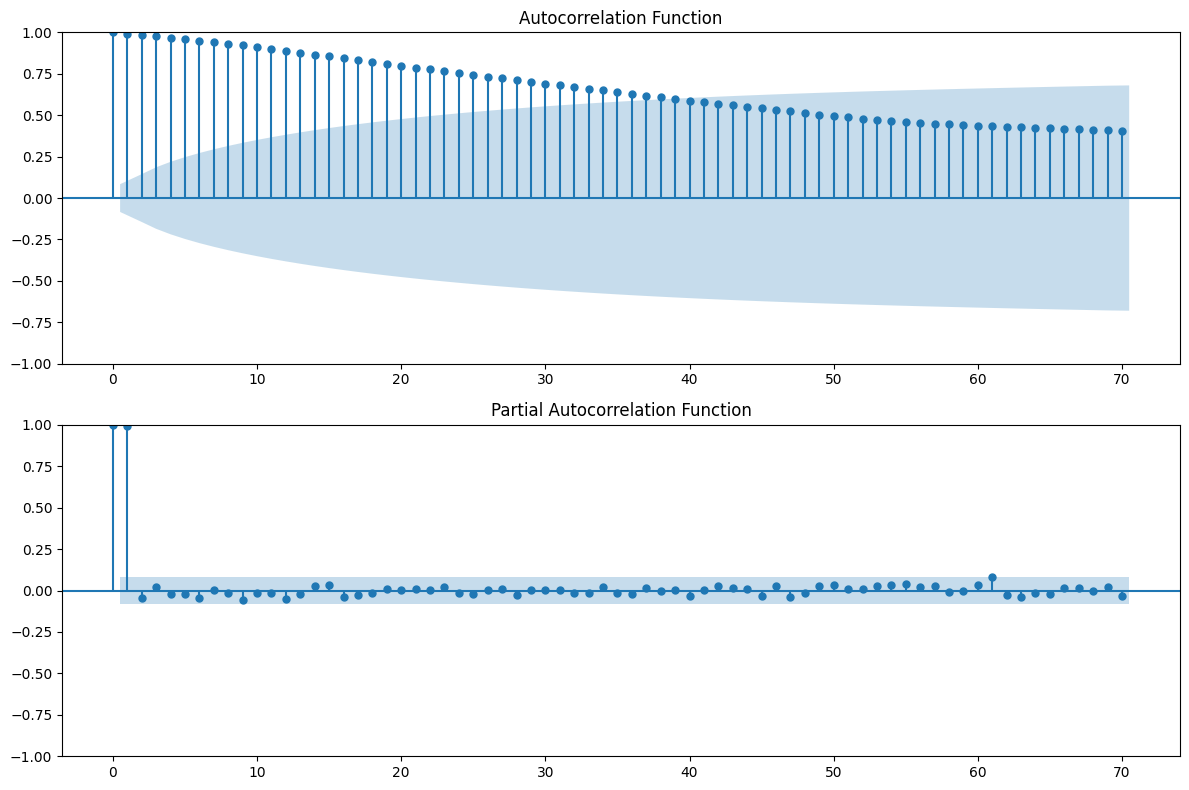

In [ ]:
plot_acf_pacf(df_ar.Price, lags=70)

Since the data has trend and seasonality, p and q values cannot be selected. ACF and PACF plot after detrending p and q value are selected.

In [ ]:
train_size = int(df_ar.shape[0]*0.9)
train_ar, test_ar = df_ar[:train_size], df_ar[train_size:]
train_ar.shape, test_ar.shape

((492, 2), (55, 2))

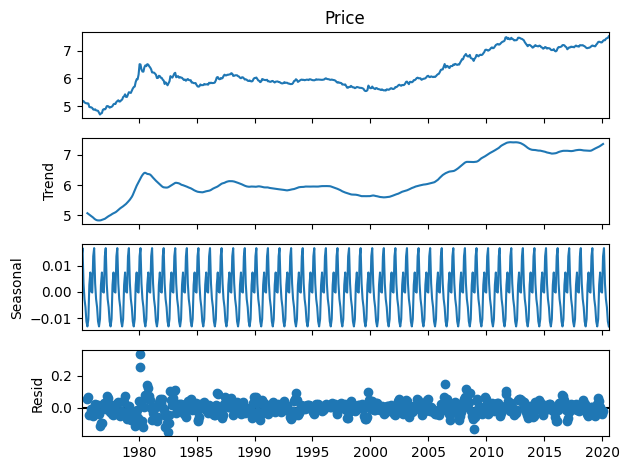

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_temp_ar = df_ar.set_index('Date')
seasonal_decompose(df_temp_ar.Price).plot();

In [ ]:
from statsmodels.tsa.stattools import adfuller
print(f'p-value : {adfuller(df_ar.Price)[1].round(4)}')

p-value : 0.5847


In [ ]:
df_ar['lag1']= df_ar.Price.diff(periods=1)

In [ ]:
df_ar.dropna(inplace=True)

In [ ]:
print(f'p-value for detrended series : {adfuller(df_ar.Price.diff(periods=1).dropna())[1]}')

p-value for detrended series : 9.99955664354164e-06


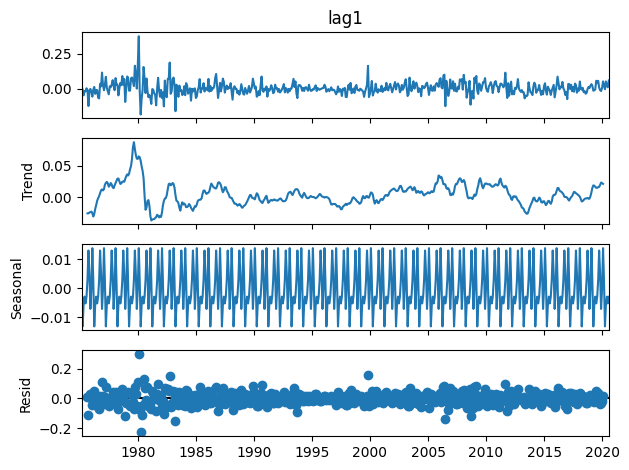

In [ ]:
seasonal_decompose(df_ar.set_index('Date')['lag1']).plot();

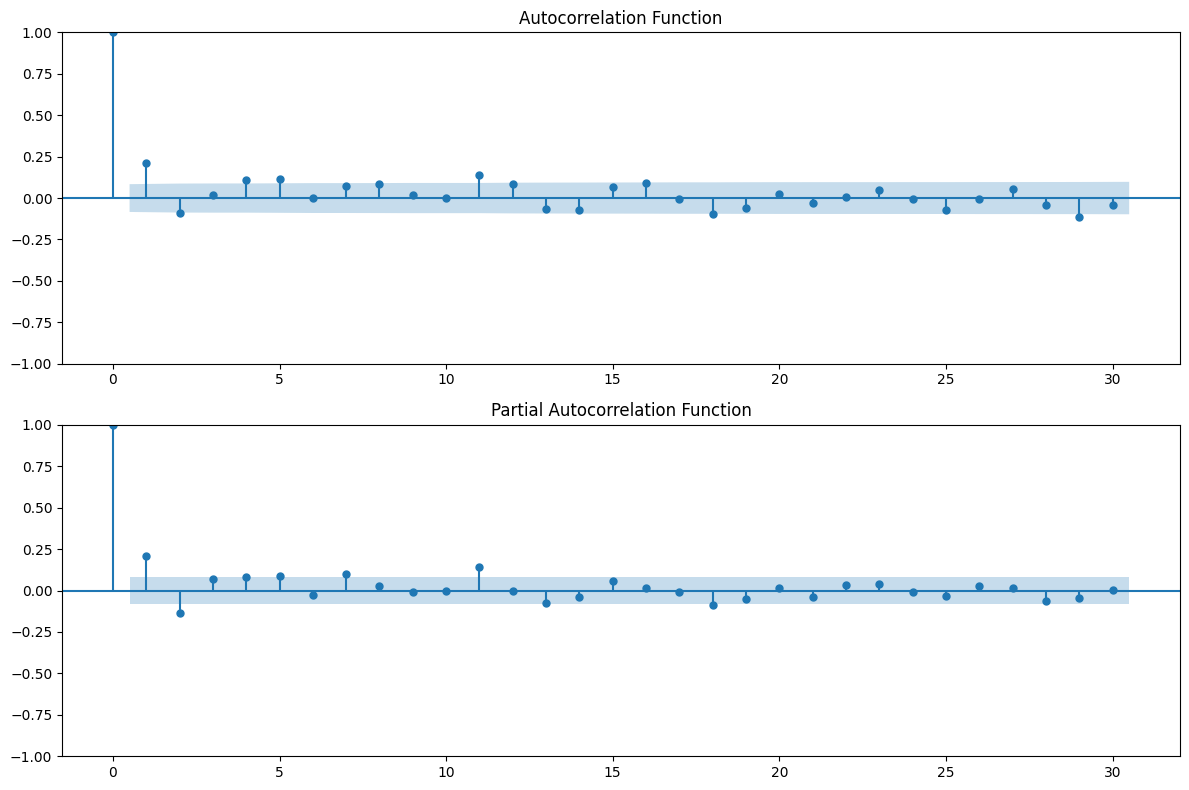

In [ ]:
plot_acf_pacf(df_ar.lag1, lags=30)

From above graph we can assign p value from 1 to 4 and q value from 1 to 4.

p value - How many lag values to consider

q value - window size for moving average

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model_fit = AutoReg(train_ar.Price, lags=8).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Price   No. Observations:                  492
Model:                     AutoReg(8)   Log Likelihood                 819.571
Method:               Conditional MLE   S.D. of innovations              0.044
Date:                Mon, 27 May 2024   AIC                          -1619.141
Time:                        07:09:08   BIC                          -1577.320
Sample:                             8   HQIC                         -1602.708
                                  492                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0324      0.020      1.587      0.112      -0.008       0.072
Price.L1       1.2335      0.045     27.295      0.000       1.145       1.322
Price.L2      -0.3992      0.072     -5.562      0.000      -0.540      -0.259
Price.L3       0.2323      0.074      3.146      0.002       0.088       0.377
Price.L4      -0.0119      0.075     -0.160      0.873      -0.158       0.134
Price.L5       0.0492      0.075      0.660      0.509      -0.097       0.195
Price.L6      -0.1495      0.074     -2.024      0.043      -0.294      -0.005
Price.L7       0.1472      0.072      2.047      0.041       0.006       0.288
Price.L8      -0.1066      0.045     -2.355      0.019      -0.195      -0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1742           -0.7145j            1.3745           -0.4130
AR.2           -1.1742           +0.7145j            1.3745            0.4130
AR.3           -0.0921           -1.3582j            1.3613           -0.2608
AR.4           -0.0921           +1.3582j            1.3613            0.2608
AR.5            1.0082           -0.0000j            1.0082           -0.0000
AR.6            1.2389           -0.0000j            1.2389           -0.0000
AR.7            0.8329           -1.2043j            1.4643           -0.1537
AR.8            0.8329           +1.2043j            1.4643            0.1537
-----------------------------------------------------------------------------
"""

In [ ]:
model_fit.params

const       0.032366
Price.L1    1.233507
Price.L2   -0.399163
Price.L3    0.232337
Price.L4   -0.011913
Price.L5    0.049239
Price.L6   -0.149479
Price.L7    0.147201
Price.L8   -0.106642
dtype: float64

In [ ]:
predictions_ar = model_fit.predict(start=len(train_ar), end=len(train_ar)+len(test_ar)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predictions_ar.shape

(55,)

In [ ]:
predictions_ar.shape, test_ar.Price.shape

((55,), (55,))

In [ ]:
ar_metrics = evaluate_model(test_ar.Price.values, predictions_ar.values)
ar_metrics

{'mae': 359.2004963511041,
 'mse': 163677.4638674386,
 'rmse': 404.5707155336859,
 'mape': 25.7}

In [ ]:
final_results_df = append_model_results(final_results_df, 'AR model with log P lag 8 from 1975', ar_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70


for lags = 2 (192.04605936983063, 214.9166360995651, -1.2704841981968222, 15.35)

for lags = 3 (238.95450391005394, 264.5538242501645, -2.4403807005896088, 19.03)

for lags = 5 (202.40723141936272, 226.20564392745513, -1.5152739222478688, 16.17)

for lags = 8 (84.69316127345786, 128.33359004137327, 0.19042124644617142, 6.17)

for lags = 10 (95.07945481933814, 124.24044487129585, 0.24124003000080008, 7.22)

for lags = 20 (110.31539658268157, 169.7185181132867, -0.41591400437694914, 7.73)

for lags = 30 (131.97257973657076, 186.25232697829614, -0.7052255446453994, 9.35)

In [ ]:
for lag in range(1, 21):
    model_fit = AutoReg(train_ar.Price, lags=lag).fit()
    predictions_ar = model_fit.predict(start=len(train_ar), end=len(train_ar)+len(test_ar)-1)
    results = evaluate_model(test_ar.Price.values, predictions_ar.values)
    print(f'Lag: {lag}, Results: {results}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided a

Lag: 1, Results: {'mae': 242.41050606955335, 'mse': 79189.18879718702, 'rmse': 281.4057369656614, 'mape': 17.21}
Lag: 2, Results: {'mae': 285.8760140144168, 'mse': 106742.36309186676, 'rmse': 326.7144978293231, 'mape': 20.37}
Lag: 3, Results: {'mae': 245.45032626485252, 'mse': 81924.82367305404, 'rmse': 286.2251276059704, 'mape': 17.4}
Lag: 4, Results: {'mae': 269.12259134639595, 'mse': 96648.38274303389, 'rmse': 310.88323007687933, 'mape': 19.12}
Lag: 5, Results: {'mae': 294.9108967591756, 'mse': 114024.24797615407, 'rmse': 337.6747665671127, 'mape': 21.0}
Lag: 6, Results: {'mae': 323.7133945489979, 'mse': 135280.90291351665, 'rmse': 367.80552322323365, 'mape': 23.1}
Lag: 7, Results: {'mae': 317.85227359502136, 'mse': 130895.75836294043, 'rmse': 361.7951884187246, 'mape': 22.67}
Lag: 8, Results: {'mae': 359.2004963511041, 'mse': 163677.4638674386, 'rmse': 404.5707155336859, 'mape': 25.7}
Lag: 9, Results: {'mae': 384.719159207226, 'mse': 186060.04823351736, 'rmse': 431.3467841928549, '

# ARIMA Model:

ARIMA (AutoRegressive Integrated Moving Average) is a time series forecasting model that combines autoregression and moving average techniques.

In [ ]:
df_arima = df.copy()

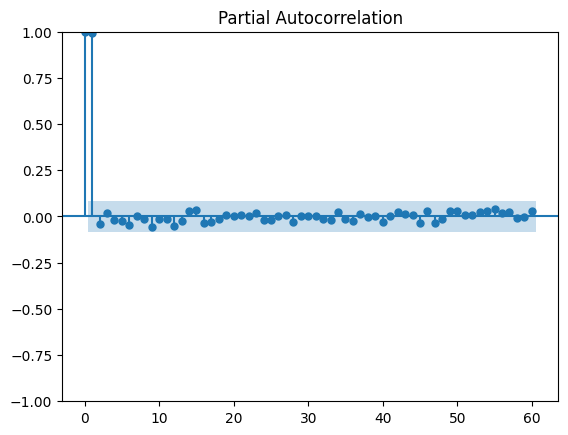

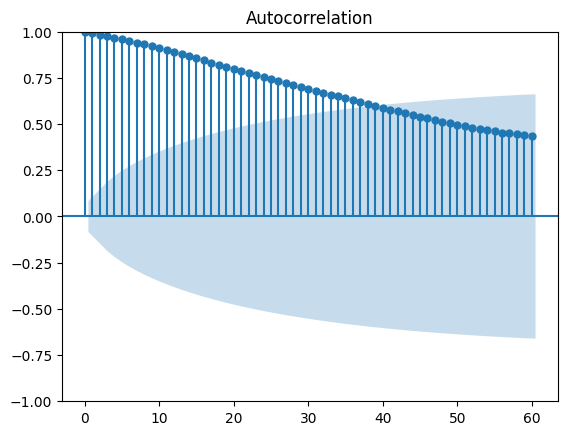

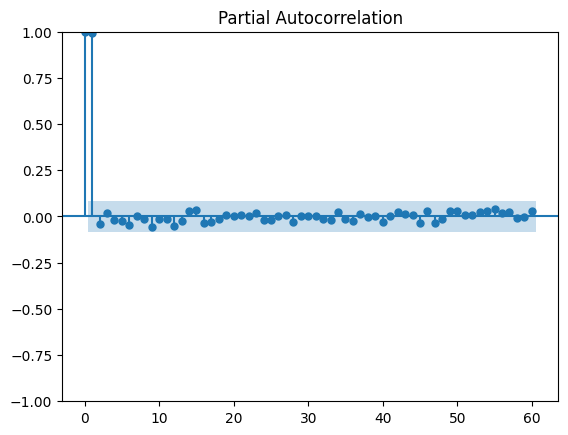

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.Price, lags=60)
plot_pacf(df.Price, lags=60)

Since the data has trend, taking p and q value from acf and pacf graph is not appropriate.

<Axes: xlabel='Date'>

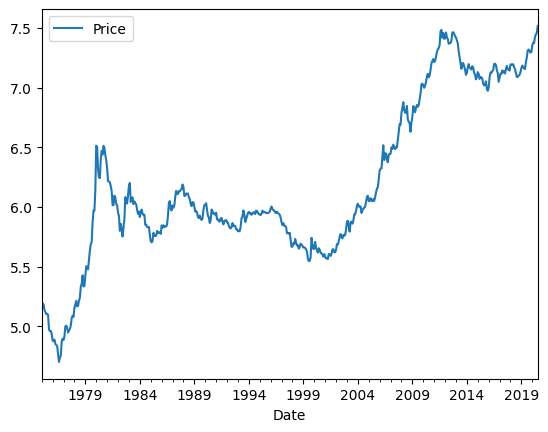

In [ ]:
df_arima.plot('Date','Price')

To remove the trending differencing once is sufficient ( from DFT test )

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_arima = df.copy()

train_arima, test_arima = df_arima[: train_size], df_arima[train_size:]

In [ ]:
# Check if differencing is required (Dickey-Fuller test)
result = adfuller(df_arima['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.394914
p-value: 0.584712


In [ ]:
# Since p value is not less than 0.05 so taking first difference
df_arima['Price_diff'] = df_arima['Price'].diff().dropna()

In [ ]:
# Checking DFT (Dickey-Fuller test) after 1 differencing
result = adfuller(df_arima['Price_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.111330
p-value: 0.000013


since p - value is less than 0.05. we can proceed with d = 1

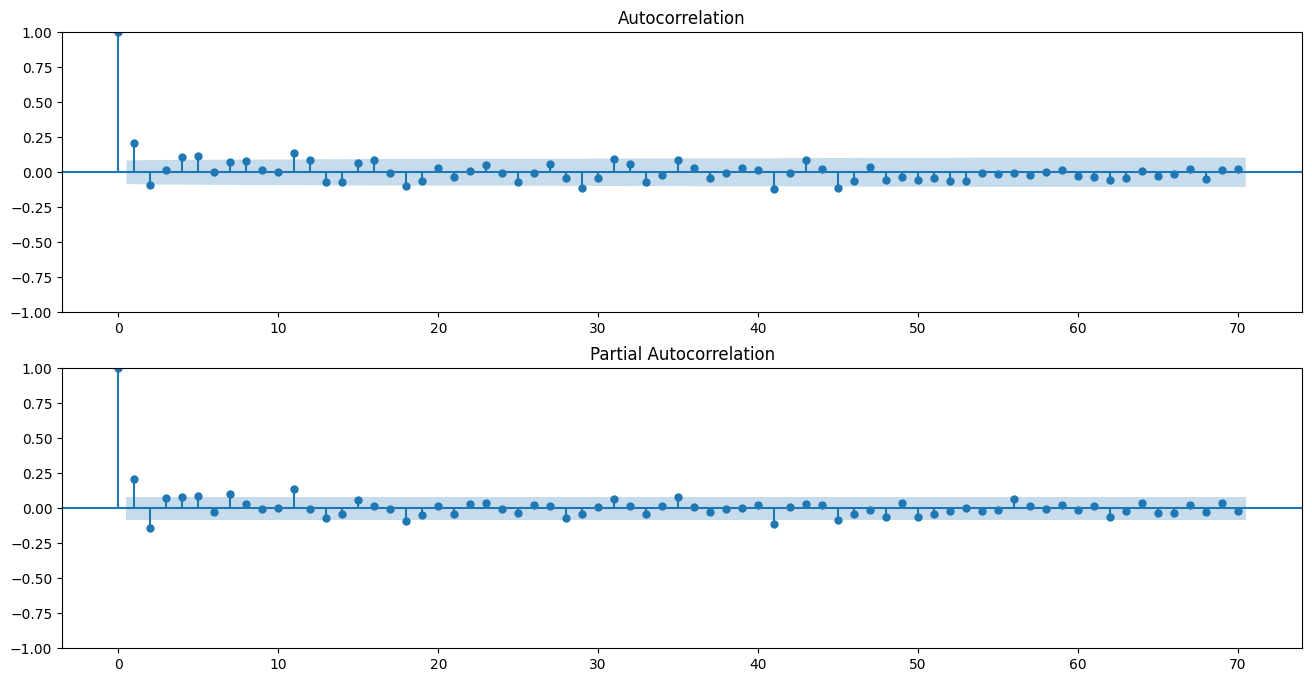

In [ ]:
# Plotting ACF and PACF after detrending
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
plot_acf(df_arima['Price_diff'].dropna(), lags=70, ax=ax[0])
plot_pacf(df_arima['Price_diff'].dropna(), lags=70, ax=ax[1])
plt.show()


From above graphs:

p (AR order): 1-4 (based on PACF plot)

d (differencing order): 1-2 (based on Dickey-Fuller test)

q (MA order): 1-4 (based on the ACF plot)

In [ ]:
def arima_model(df_series, order=(0,0,0)):
  '''
  Input:
  dataframe series as input along with p, d and q for model trianing and returns fitted model
  '''
  model = ARIMA(df_series, order = order)
  model_fit = model.fit()
  print(model_fit.summary())
  return model_fit

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def predict_data(df, no_future_dates, fitted_model):
  '''
  Inputs dataframe as df, number of future_dates to predict as no_future_dates and model fitted as fitted_model.

  Returns forecast_df as an output containing Date and forecasted values for number of dates mentioned

  '''
  dt = df.copy()
  future_steps = no_future_dates  # Define the number of future steps you want to predict

  # Assuming 'last_date' is your last date
  last_date = datetime.strptime(str(dt.tail(1).Date.values[0]).split('T')[0], "%Y-%m-%d")


  res = [last_date + relativedelta(months=i) for i in range(1, future_steps+1)]

  forecast = model_fit.forecast(steps=future_steps)
  forecast = pd.Series(forecast.values)
  forecast_df = pd.DataFrame(list(zip(res, forecast)), columns=['Date', 'Forecast'])
  return forecast_df

In [ ]:
train_arima.shape, test_arima.shape

((492, 2), (55, 2))

In [ ]:
import itertools
def best_pdq(df, date_col='Date', target_col = 'Price'):
  df_params = df.copy()
  train_size = int(0.9*df_params.shape[0])
  train_arima, test_arima = df_params[: train_size], df_params[train_size:]
  # Define the range for the p, d, q parameters
  p = q = range(1, 6)
  d = range(1, 4)

  # Generate all different combinations of p, d, q triplets
  pdq = list(itertools.product(p, d, q))

  best_mape = np.inf
  best_pdq = None
  best_model = None

  for param in pdq:
    try:
        model = ARIMA(train_arima[target_col], order = param)
        model_fit = model.fit()
        predictions = model_fit.forecast(len(test_arima))
        mape = evaluate_model(test_arima[target_col].values, predictions.values).get('mape', None)
        # print(mape)
        if mape < best_mape:
                best_mape = mape
                best_pdq = param
                best_model = model_fit
    except:
      pass
  return best_pdq

In [ ]:
best_order = best_pdq(df_arima)
best_order

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. for

(4, 2, 5)

In [ ]:
model_fit_arima = arima_model(train_arima['Price'], order=best_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  492
Model:                 ARIMA(4, 2, 5)   Log Likelihood                 829.637
Date:                Mon, 27 May 2024   AIC                          -1639.275
Time:                        07:10:54   BIC                          -1597.331
Sample:                             0   HQIC                         -1622.802
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8111      0.316     -2.570      0.010      -1.430      -0.192
ar.L2         -0.9152      0.208     -4.406      0.000      -1.322      -0.508
ar.L3         -0.7201      0.329     -2.188      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predicted_arima = predict_data(train_arima, len(test_arima), model_fit_arima)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
arima_metrics = evaluate_model(test_arima['Price'].values, predicted_arima['Forecast'].values)
arima_metrics

{'mae': 409.094478302936,
 'mse': 206835.76747924573,
 'rmse': 454.79200463425667,
 'mape': 29.38}

In [ ]:
final_results_df = append_model_results(final_results_df, 'ARIMA model with log P from 1975', arima_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38


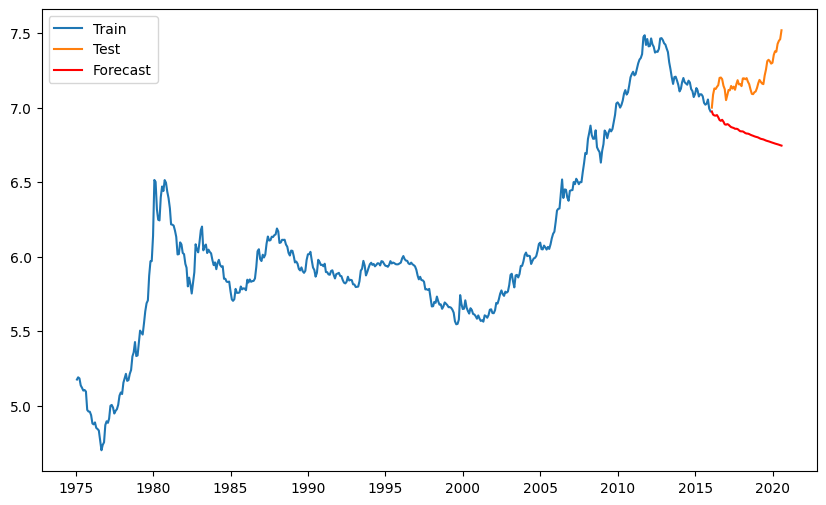

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_arima.Date, train_arima['Price'], label='Train')
plt.plot(test_arima.Date, test_arima['Price'], label='Test')
plt.plot(predicted_arima.Date, predicted_arima['Forecast'], label='Forecast', color='red')
plt.legend()
plt.show()

# SARIMA Model:

In [ ]:
df_sarima = df.copy()

In [ ]:
df_sarima.head(2)

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470


In [ ]:
train_sarima, test_sarima = df_sarima[:train_size], df_sarima[train_size:]

In [ ]:
train_sarima.shape,  test_sarima.shape

((492, 2), (55, 2))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_model(df_series, order, seasonal_order):
    '''
    Input:
    dataframe series as input along with order and seasonal_order for model training and returns fitted model
    '''
    model = SARIMAX(df_series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit


In [ ]:
def predict_data(df, no_future_dates, fitted_model):
    '''
    Input:
    df: DataFrame containing the date column
    no_future_dates: Number of future dates to forecast
    fitted_model: Fitted SARIMA model
    Output:
    DataFrame containing future dates and forecasted values
    '''
    last_date = df['Date'].iloc[-1]  # Extracting the last date from the DataFrame
    res = [last_date + pd.DateOffset(months=i) for i in range(1, no_future_dates+1)]  # Generating future dates

    forecast = fitted_model.forecast(steps=no_future_dates)  # Forecasting future values
    forecast_df = pd.DataFrame({'Date': res, 'Forecast': forecast})  # Creating DataFrame for forecasted values
    return forecast_df


In [ ]:
# to find pdq and PDQ
def sarima_best_pdq_PDQ(df, date_col='Date', target_col = 'Price'):
  df_params = df.copy()
  train_size = int(0.9*df_params.shape[0])
  train_sarima, test_sarima = df_params[: train_size], df_params[train_size:]
  # Define the range for the p, d, q parameters
  p = q = range(1, 4)
  d = range(1, 3)
  P = Q = range(1, 3)
  D = range(1,2)
  s = 12

  # Generate all different combinations of p, d, q triplets
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]
  best_mae = np.inf
  best_parameters = None
  best_model = None

  for param in pdq:
      for seasonal_param in seasonal_pdq:
          try:
              model = SARIMAX(train_sarima[target_col],
                                                order=param,
                                                seasonal_order=seasonal_param,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
              model_fit = model.fit(disp=False)
              predictions = model_fit.forecast(steps=len(test_sarima))

              mae = evaluate_model(test_sarima[target_col].values, predictions.values).get('mae', None)
              # print(mae)
              if mae < best_mae:
                    best_mae = mae
                    best_parameters = (param, seasonal_param)
                    best_model = model_fit

          except:
            pass

  return best_parameters



In [ ]:
# sarima_best_pdq_PDQ(df_sarima)

In [ ]:
# Train SARIMA model
order =(2, 1, 3) # (2, 1, 1)
seasonal_order =(2, 1, 1, 12) # (1, 1, 1, 12)
fitted_model = sarima_model(train_sarima['Price'], order, seasonal_order)

# Forecast future values
no_future_dates = 12

forecast_df = predict_data(df_sarima, no_future_dates, fitted_model)
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                  492
Model:             SARIMAX(2, 1, 3)x(2, 1, [1], 12)   Log Likelihood                 746.362
Date:                              Mon, 27 May 2024   AIC                          -1474.725
Time:                                      07:11:04   BIC                          -1437.682
Sample:                                           0   HQIC                         -1460.129
                                              - 492                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1012      0.220      5.001      0.000       0.670       1.533
ar.L2         -0.23

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predicted_sarima = predict_data(train_sarima, len(test_sarima), fitted_model)
sarima_metrics = evaluate_model(test_sarima['Price'].values, predicted_sarima['Forecast'].values)
sarima_metrics

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{'mae': 193.73178081631187,
 'mse': 50666.453087350514,
 'rmse': 225.09209912244924,
 'mape': 13.83}

In [ ]:
final_results_df = append_model_results(final_results_df, 'SARIMA model with log P from 1975', sarima_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83


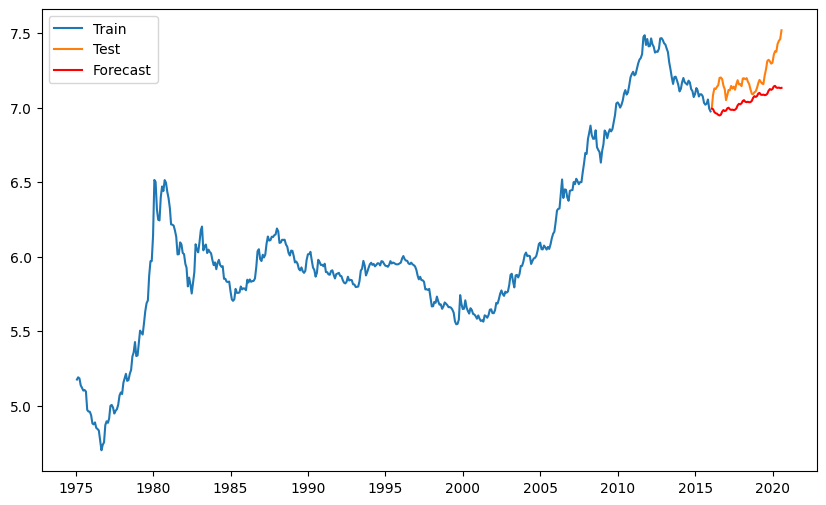

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sarima.Date, train_sarima['Price'], label='Train')
plt.plot(test_sarima.Date, test_sarima['Price'], label='Test')
plt.plot(predicted_sarima.Date, predicted_sarima['Forecast'], label='Forecast', color='red')
plt.legend()
plt.show()

# SARIMAX Model:

In [ ]:
stock_df = pd.read_csv('/content/nasdaq history.csv')[['Date', 'Close/Last']].rename(columns = {'Close/Last':'Close'})

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2531 non-null   object 
 1   Close   2531 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.7+ KB


In [ ]:
stock_df.Date = pd.to_datetime(stock_df.Date)

<Axes: xlabel='Date'>

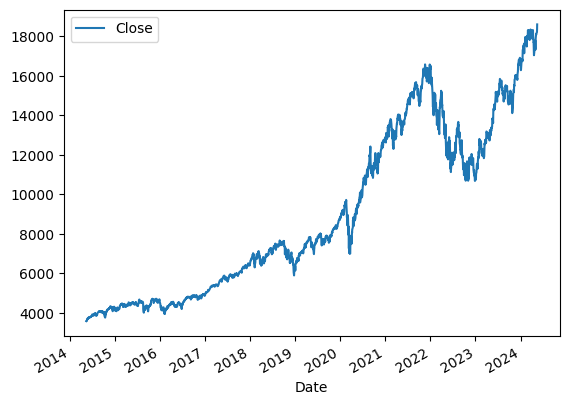

In [ ]:
stock_df.plot('Date', 'Close')

In [ ]:
stock_df.Close = np.log(stock_df.Close)

In [ ]:
stock_df.sort_values('Date', ascending=True, inplace=True)

In [ ]:
stock_df.head()

,Date,Close
2530,2014-05-16,8.185127
2529,2014-05-19,8.193019
2528,2014-05-20,8.188775
2527,2014-05-21,8.198532
2526,2014-05-22,8.202718


In [ ]:
df_sarima_exo = df.copy()

In [ ]:
stock_df.Date.max()

Timestamp('2024-05-15 00:00:00')

In [ ]:
stock_df = stock_df.resample('M', on = 'Date').mean().reset_index().query('Date <= "2020-07-31"')

In [ ]:
df_sarima_exo = df_sarima_exo.resample('M', on = 'Date').mean().reset_index()

In [ ]:
df_sarima_exo.Date.head()

0   1975-01-31
1   1975-02-28
2   1975-03-31
3   1975-04-30
4   1975-05-31
Name: Date, dtype: datetime64[ns]

In [ ]:
df_sarima_exo = df_sarima_exo[(df_sarima_exo.Date >= stock_df.Date.min()) & (df_sarima_exo.Date <= stock_df.Date.max())]

In [ ]:
df_sarima_exo.shape, stock_df.shape

((75, 2), (75, 2))

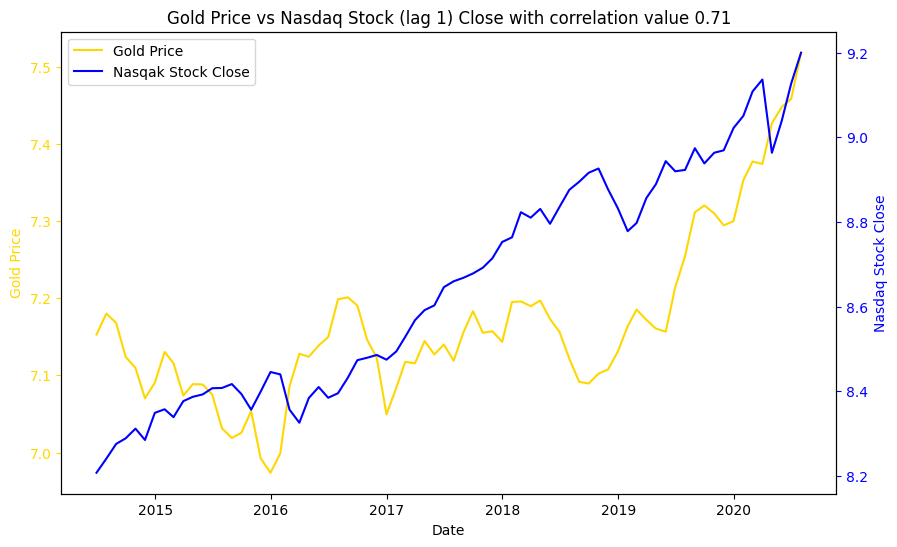

In [ ]:
# Check the correlation with price and stock closing price
# Merging both DataFrames on 'Date'
merged_df_exo = pd.merge(df_sarima_exo, stock_df, on='Date', how='inner')

merged_df_exo.Close = merged_df_exo.Close.shift(1)
merged_df_exo.dropna(inplace=True)
# Creating a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting gold price on the first y-axis
ax1.plot(merged_df_exo['Date'], merged_df_exo['Price'], label='Gold Price', color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params('y', colors='gold')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df_exo['Date'], merged_df_exo['Close'], label='Nasqak Stock Close', color='blue')
ax2.set_ylabel('Nasdaq Stock Close', color='blue')
ax2.tick_params('y', colors='blue')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Gold Price vs Nasdaq Stock (lag 1) Close with correlation value {round(np.corrcoef(merged_df_exo.Price.values, merged_df_exo.Close.values)[0,1], 2)}')
plt.show()

In [ ]:
merged_df_exo.head()

,Date,Price,Close
1,2014-06-30,7.152940,8.207404
2,2014-07-31,7.180061,8.240643
3,2014-08-31,7.167813,8.275483
4,2014-09-30,7.123939,8.288685
5,2014-10-31,7.109524,8.311590


Sarimax model building

In [ ]:
merged_df_exo_sarimax = merged_df_exo.copy()
merged_df_exo_sarimax.High = np.log(merged_df_exo_sarimax.Close)

train_size_sarimax = int(len(merged_df_exo_sarimax) * 0.9)
train_sarimax, test_sarimax = merged_df_exo_sarimax[:train_size_sarimax], merged_df_exo_sarimax[train_size_sarimax:]

# Separate the exogenous variable
exog_train_sarimax = train_sarimax[['Close']]
exog_test_sarimax = test_sarimax[['Close']]

def sarimax_model(endog, exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    '''
    Input:
    endog - endogenous time series data
    exog - exogenous variables
    order - (p, d, q) order of the ARIMA model
    seasonal_order - (P, D, Q, s) order of the seasonal component

    Returns:
    Fitted model object
    '''
    model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

# Fit the model
model_fit_sarimax = sarimax_model(train_sarimax['Price'], exog_train_sarimax, order = (2, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   66
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 105.594
Date:                            Mon, 27 May 2024   AIC                           -197.188
Time:                                    07:11:08   BIC                           -183.396
Sample:                                         0   HQIC                          -191.884
                                             - 66                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Close         -0.2034      0.128     -1.585      0.113      -0.455       0.048
ar.L1         -0.1153      1.511   

In [ ]:
def predict_data_sarimax(df, no_future_dates, fitted_model, exog_future):
    '''
    Input:
    df - DataFrame containing the date column
    no_future_dates - Number of future dates to forecast
    fitted_model - Fitted SARIMA model
    exog_future - Future values of exogenous variables

    Output:
    DataFrame containing future dates and forecasted values
    '''
    last_date = df['Date'].iloc[-1]  # Extracting the last date from the DataFrame
    future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, no_future_dates+1)]  # Generating future dates

    forecast = fitted_model.get_forecast(steps=no_future_dates, exog=exog_future)  # Forecasting future values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.predicted_mean})  # Creating DataFrame for forecasted values
    forecast_df.set_index('Date', inplace=True)
    return forecast_df

# Forecast
predicted_sarimax = predict_data_sarimax(test_sarimax, len(test_sarimax), model_fit_sarimax, exog_test_sarimax)
predicted_sarimax

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Forecast
Date,
2020-08-31,7.272795
2020-09-30,7.306529
2020-10-31,7.322482
2020-11-30,7.317652
2020-12-31,7.368699
2021-01-31,7.348285
2021-02-28,7.337314
2021-03-31,7.322661


In [ ]:
evaluation_results_sarimax = evaluate_model(test_sarimax['Price'].values, predicted_sarimax['Forecast'].values)
evaluation_results_sarimax


{'mae': 132.84319247481676,
 'mse': 25275.16123537489,
 'rmse': 158.9816380446965,
 'mape': 7.77}

In [ ]:
final_results_df = append_model_results(final_results_df, 'SARIMAX log P from 1975 w Stock Price exo',evaluation_results_sarimax)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77


In [ ]:
# Gold price and lag 1 stock price sarimax
merged_df_exo_sarimax = merged_df_exo.copy()
# merged_df_exo_sarimax.Close = np.log(merged_df_exo_sarimax.Close)

merged_df_exo_sarimax.Close = merged_df_exo_sarimax.Close.shift(1)

merged_df_exo_sarimax.dropna(inplace=True)

train_size_sarimax = int(len(merged_df_exo_sarimax) * 0.9)
train_sarimax, test_sarimax = merged_df_exo_sarimax[:train_size_sarimax], merged_df_exo_sarimax[train_size_sarimax:]

# Separate the exogenous variable
exog_train_sarimax = train_sarimax[['Close']]
exog_test_sarimax = test_sarimax[['Close']]

def sarimax_model(endog, exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    '''
    Input:
    endog - endogenous time series data
    exog - exogenous variables
    order - (p, d, q) order of the ARIMA model
    seasonal_order - (P, D, Q, s) order of the seasonal component

    Returns:
    Fitted model object
    '''
    model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

# Fit the model
model_fit_sarimax = sarimax_model(train_sarimax['Price'], exog_train_sarimax, order = (2, 1, 1))

def predict_data_sarimax(df, no_future_dates, fitted_model, exog_future):
    '''
    Input:
    df - DataFrame containing the date column
    no_future_dates - Number of future dates to forecast
    fitted_model - Fitted SARIMA model
    exog_future - Future values of exogenous variables

    Output:
    DataFrame containing future dates and forecasted values
    '''
    last_date = df['Date'].iloc[-1]  # Extracting the last date from the DataFrame
    future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, no_future_dates+1)]  # Generating future dates

    forecast = fitted_model.get_forecast(steps=no_future_dates, exog=exog_future)  # Forecasting future values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.predicted_mean})  # Creating DataFrame for forecasted values
    forecast_df.set_index('Date', inplace=True)
    return forecast_df

# Forecast
predicted_sarimax = predict_data_sarimax(test_sarimax, len(test_sarimax), model_fit_sarimax, exog_test_sarimax)
predicted_sarimax

evaluation_results_sarimax = evaluate_model(test_sarimax['Price'].values, predicted_sarimax['Forecast'].values)
evaluation_results_sarimax

final_results_df = append_model_results(final_results_df, 'SARIMAX with log P from 1975 w Stock Price exo lag 1',evaluation_results_sarimax)
final_results_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   65
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 102.829
Date:                            Mon, 27 May 2024   AIC                           -191.658
Time:                                    07:11:13   BIC                           -178.000
Sample:                                         0   HQIC                          -186.422
                                             - 65                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Close         -0.1500      0.197     -0.762      0.446      -0.536       0.236
ar.L1          0.1552      4.323   

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39


Adding `Gold Price` as exogenous variable

In [ ]:
df_search_trend_exo = pd.read_csv('/content/multiTimeline.csv', names = ['Search'], header=0)

In [ ]:
df_search_trend_exo.shape, df_search_trend_exo.head(3)

((189, 1),
                           Search
 Month    Gold price: (Worldwide)
 2004-12                       10
 2005-01                        9)

In [ ]:
df_search_trend_exo.drop('Month', axis = 0, inplace=True)

In [ ]:
df_search_trend_exo.head(3)

,Search
2004-12,10
2005-01,9
2005-02,6


In [ ]:
df_search_trend_exo.reset_index(inplace=True)

In [ ]:
df_search_trend_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   188 non-null    object
 1   Search  188 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [ ]:
df_search_trend_exo.columns = ['Date', 'Search']

In [ ]:
df_search_trend_exo.Date = pd.to_datetime(df_search_trend_exo.Date)

In [ ]:
df_search_trend_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    188 non-null    datetime64[ns]
 1   Search  188 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ KB


In [ ]:
df_search_trend_exo.Date = df_search_trend_exo.Date + pd.offsets.MonthEnd(0)

In [ ]:
df_search_trend_exo.head(2)

,Date,Search
0,2004-12-31,10
1,2005-01-31,9


In [ ]:
df_search_trend_exo.Search = pd.to_numeric(df_search_trend_exo.Search)

In [ ]:
df_search_trend_exo.Search = np.log(df_search_trend_exo.Search)

In [ ]:
df_search_trend_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    188 non-null    datetime64[ns]
 1   Search  188 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [ ]:
df_search_trend_exo.head(3)

,Date,Search
0,2004-12-31,2.302585
1,2005-01-31,2.197225
2,2005-02-28,1.791759


In [ ]:
df_search_trend_exo.shape

(188, 2)

In [ ]:
df_sarima_exo_trend = df.copy()

In [ ]:
df_sarima_exo_trend.head(3)

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470
302,1975-03-31,5.182923


In [ ]:
df_sarima_exo_trend = df_sarima_exo_trend[(df_sarima_exo_trend.Date >= df_search_trend_exo.Date.min()) & (df_sarima_exo_trend.Date <= df_search_trend_exo.Date.max())]

In [ ]:
df_search_trend_exo.shape, df_sarima_exo_trend.shape

((188, 2), (188, 2))

In [ ]:
df_search_trend_exo.head(1), df_sarima_exo_trend.head(1)

(        Date    Search
 0 2004-12-31  2.302585,
           Date     Price
 659 2004-12-31  6.093511)

In [ ]:
df_search_trend_exo.tail(1), df_sarima_exo_trend.tail(1)

(          Date    Search
 187 2020-07-31  4.189655,
           Date     Price
 846 2020-07-31  7.517959)

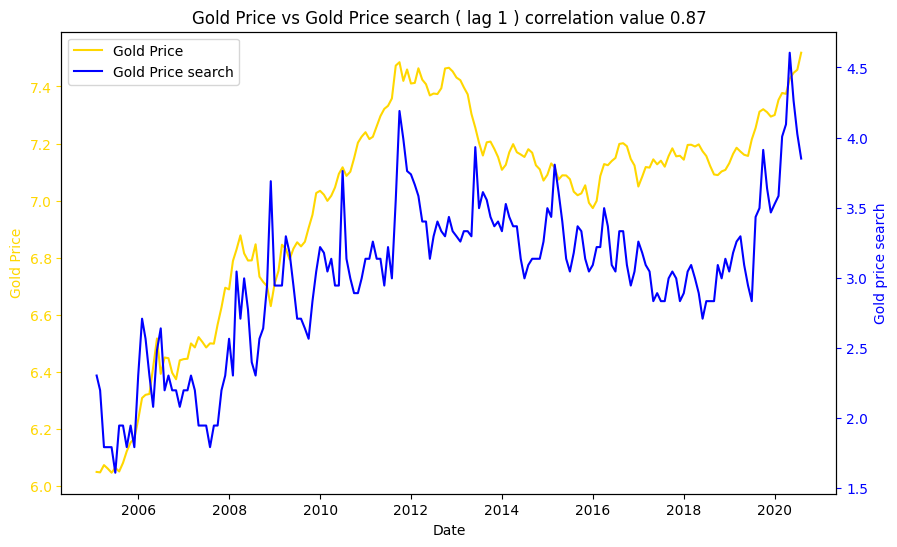

In [ ]:
# Plot and correlation with word count gold price
# Merging both DataFrames on 'Date'
merged_df_exo_trend_sarima = pd.merge(df_sarima_exo_trend, df_search_trend_exo, on='Date', how='inner')

# Creating a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

merged_df_exo_trend_sarima.Search = merged_df_exo_trend_sarima.Search.shift(1)
merged_df_exo_trend_sarima.dropna(inplace=True)

# Plotting gold price on the first y-axis
ax1.plot(merged_df_exo_trend_sarima['Date'], merged_df_exo_trend_sarima['Price'], label='Gold Price', color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params('y', colors='gold')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df_exo_trend_sarima['Date'], merged_df_exo_trend_sarima['Search'], label='Gold Price search', color='blue')
ax2.set_ylabel('Gold price search', color='blue')
ax2.tick_params('y', colors='blue')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Gold Price vs Gold Price search ( lag 1 ) correlation value {round(np.corrcoef(merged_df_exo_trend_sarima.Price.values, np.log(merged_df_exo_trend_sarima.Search.values))[0,1], 2)}')
plt.show()

In [ ]:
# Sarimax model building with word count as exogenous variable ( without lag values )
merged_df_exo_sarimax = merged_df_exo_trend_sarima.copy()

# merged_df_exo_sarimax.Search = np.log(merged_df_exo_sarimax.Search)

train_size_sarimax = int(len(merged_df_exo_sarimax) * 0.9)
train_sarimax, test_sarimax = merged_df_exo_sarimax[:train_size_sarimax], merged_df_exo_sarimax[train_size_sarimax:]

# Separate the exogenous variable
exog_train_sarimax = train_sarimax[['Search']]
exog_test_sarimax = test_sarimax[['Search']]

def sarimax_model(endog, exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    '''
    Input:
    endog - endogenous time series data
    exog - exogenous variables
    order - (p, d, q) order of the ARIMA model
    seasonal_order - (P, D, Q, s) order of the seasonal component

    Returns:
    Fitted model object
    '''
    model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

# Fit the model
model_fit_sarimax = sarimax_model(train_sarimax['Price'], exog_train_sarimax, order = (2, 1, 1))

def predict_data_sarimax(df, no_future_dates, fitted_model, exog_future):
    '''
    Input:
    df - DataFrame containing the date column
    no_future_dates - Number of future dates to forecast
    fitted_model - Fitted SARIMA model
    exog_future - Future values of exogenous variables

    Output:
    DataFrame containing future dates and forecasted values
    '''
    last_date = df['Date'].iloc[-1]  # Extracting the last date from the DataFrame
    future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, no_future_dates+1)]  # Generating future dates

    forecast = fitted_model.get_forecast(steps=no_future_dates, exog=exog_future)  # Forecasting future values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.predicted_mean})  # Creating DataFrame for forecasted values
    forecast_df.set_index('Date', inplace=True)
    return forecast_df

# Forecast
predicted_sarimax = predict_data_sarimax(test_sarimax, len(test_sarimax), model_fit_sarimax, exog_test_sarimax)
predicted_sarimax

evaluation_results_sarimax = evaluate_model(test_sarimax['Price'].values, predicted_sarimax['Forecast'].values)
evaluation_results_sarimax


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  168
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 264.981
Date:                            Mon, 27 May 2024   AIC                           -515.963
Time:                                    07:11:20   BIC                           -494.659
Sample:                                         0   HQIC                          -507.310
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Search        -0.0149      0.011     -1.335      0.182      -0.037       0.007
ar.L1         -0.5403      0.601   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{'mae': 162.1442079553675,
 'mse': 41396.82504758782,
 'rmse': 203.46209732426288,
 'mape': 10.1}

In [ ]:
final_results_df = append_model_results(final_results_df, 'SARIMAX with log P from 1975 w Search exo',evaluation_results_sarimax)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


In [ ]:
final_results_df.sort_values('mape', ascending=True)

,name_of_model,mae,mse,rmse,mape
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38


In [ ]:
# Sarimax model with gold price and word count as exogenous ( lag 1 value considered )
merged_df_exo_sarimax = merged_df_exo_trend_sarima.copy()

# merged_df_exo_sarimax.Search = np.log(merged_df_exo_sarimax.Search)

merged_df_exo_sarimax.Search = merged_df_exo_sarimax.Search.shift(1)
merged_df_exo_sarimax.dropna(inplace=True)

train_size_sarimax = int(len(merged_df_exo_sarimax) * 0.9)
train_sarimax, test_sarimax = merged_df_exo_sarimax[:train_size_sarimax], merged_df_exo_sarimax[train_size_sarimax:]

# Separate the exogenous variable
exog_train_sarimax = train_sarimax[['Search']]
exog_test_sarimax = test_sarimax[['Search']]

def sarimax_model(endog, exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    '''
    Input:
    endog - endogenous time series data
    exog - exogenous variables
    order - (p, d, q) order of the ARIMA model
    seasonal_order - (P, D, Q, s) order of the seasonal component

    Returns:
    Fitted model object
    '''
    model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

# Fit the model
model_fit_sarimax = sarimax_model(train_sarimax['Price'], exog_train_sarimax, order = (2, 1, 1))

def predict_data_sarimax(df, no_future_dates, fitted_model, exog_future):
    '''
    Input:
    df - DataFrame containing the date column
    no_future_dates - Number of future dates to forecast
    fitted_model - Fitted SARIMA model
    exog_future - Future values of exogenous variables

    Output:
    DataFrame containing future dates and forecasted values
    '''
    last_date = df['Date'].iloc[-1]  # Extracting the last date from the DataFrame
    future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, no_future_dates+1)]  # Generating future dates

    forecast = fitted_model.get_forecast(steps=no_future_dates, exog=exog_future)  # Forecasting future values
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.predicted_mean})  # Creating DataFrame for forecasted values
    forecast_df.set_index('Date', inplace=True)
    return forecast_df

# Forecast
predicted_sarimax = predict_data_sarimax(test_sarimax, len(test_sarimax), model_fit_sarimax, exog_test_sarimax)
predicted_sarimax

evaluation_results_sarimax = evaluate_model(test_sarimax['Price'].values, predicted_sarimax['Forecast'].values)
evaluation_results_sarimax

final_results_df = append_model_results(final_results_df, 'SARIMAX with log P from 1975 w Search exo lag 1',evaluation_results_sarimax)
final_results_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  167
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 262.644
Date:                            Mon, 27 May 2024   AIC                           -511.288
Time:                                    07:11:29   BIC                           -490.030
Sample:                                         0   HQIC                          -502.653
                                            - 167                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Search        -0.0129      0.015     -0.856      0.392      -0.043       0.017
ar.L1          0.0549      3.671   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


# SES (Simple Exponential Smoothing) Model:


Simple Exponential Smoothing (SES) is a time series forecasting method for univariate data without a trend or seasonal pattern. It works by averaging past observations, with more recent observations given exponentially more weight than older observations. The weighting decreases exponentially as observations get older, which means that SES reacts more significantly to more recent changes in the data.

In [ ]:
df_ses = df.copy()

In [ ]:
# df_ses_detrending = df.copy()

In [ ]:
# df_ses_detrending.head(1)

In [ ]:
# df_ses_detrending['Price'] = df_ses_detrending.Price.shift(1)

In [ ]:
df_ses.head()

,Date,Price
300,1975-01-31,5.175381
301,1975-02-28,5.190470
302,1975-03-31,5.182923
303,1975-04-30,5.136187
304,1975-05-31,5.119747


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def ses_model(series,alpha=None ):
    '''
    Input:
    - series: Time series data
    - alpha: Smoothing level, if None, it will be optimized automatically

    Returns:
    - fitted model object
    '''
    if alpha:
        model = SimpleExpSmoothing(series).fit(smoothing_level=alpha, optimized=False)
    else:
        model = SimpleExpSmoothing(series).fit(optimized=True)
    print(model.summary())

    return model

In [ ]:
train_ses, test_ses = df_ses[:train_size], df_ses[train_size:]

In [ ]:
# df_ses_detrending.dropna(inplace=True)

In [ ]:
# train_ses, test_ses = df_ses_detrending[:train_size], df_ses_detrending[train_size:]

In [ ]:
train_ses.shape, test_ses.shape

((492, 2), (55, 2))

In [ ]:
model_fit_ses = ses_model(train_ses.Price, alpha=0.9)

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                              1.128
Optimized:                      False   AIC                          -2986.541
Trend:                           None   BIC                          -2978.144
Seasonal:                        None   AICC                         -2986.459
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
initial_level              5.1753811                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
predicted_ses = predict_data(train_ses, len(test_ses), model_fit_ses)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
ses_metrics = evaluate_model(test_ses['Price'].values, predicted_ses['Forecast'].values)
ses_metrics

{'mae': 269.88962353162316,
 'mse': 96823.26899737814,
 'rmse': 311.16437617018136,
 'mape': 19.19}

In [ ]:
final_results_df = append_model_results(final_results_df, 'SES model with log P from 1975 without detrend alpha 0.9', ses_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


In [ ]:
# for detrended series
model_fit_ses = ses_model(train_ses.Price.shift(1).dropna(), alpha=0.9)
predicted_ses = predict_data(train_ses.shift(1).dropna(), len(test_ses.shift(1).dropna()), model_fit_ses)
ses_metrics = evaluate_model(test_ses.shift(1).dropna()['Price'].values, predicted_ses['Forecast'].values)
ses_metrics

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  491
Model:             SimpleExpSmoothing   SSE                              1.127
Optimized:                      False   AIC                          -2979.724
Trend:                           None   BIC                          -2971.331
Seasonal:                        None   AICC                         -2979.642
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
initial_level              5.1753811                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{'mae': 236.80374597600905,
 'mse': 75787.9175742112,
 'rmse': 275.2960544109036,
 'mape': 16.96}

In [ ]:
def ses_model_function(df, alpha=0.9,date_col='Date', var_col='Price',  train_size=0.9):
  df_ses_model = df.copy()
  df_ses_model.dropna(inplace=True)
  train_size = int(df_ses_model.shape[0]*train_size)
  train_ses, test_ses = df_ses_model[:train_size], df_ses_model[train_size:]
  model_fit_ses = ses_model(train_ses[var_col], alpha=alpha)
  predicted_ses = predict_data(train_ses, len(test_ses), model_fit_ses)
  return evaluate_model(test_ses[var_col].values, predicted_ses['Forecast'].values)


In [ ]:
ses_model_function(df_ses)

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                              1.128
Optimized:                      False   AIC                          -2986.541
Trend:                           None   BIC                          -2978.144
Seasonal:                        None   AICC                         -2986.459
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
initial_level              5.1753811                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{'mae': 269.88962353162316,
 'mse': 96823.26899737814,
 'rmse': 311.16437617018136,
 'mape': 19.19}

In [ ]:
# for detrended series
temp_ses_df = df_ses.copy()
temp_ses_df.Price = temp_ses_df.Price.shift(1)
ses_model_function(temp_ses_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  491
Model:             SimpleExpSmoothing   SSE                              1.127
Optimized:                      False   AIC                          -2979.724
Trend:                           None   BIC                          -2971.331
Seasonal:                        None   AICC                         -2979.642
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
initial_level              5.1753811                

{'mae': 232.97898888327873,
 'mse': 74422.66789037372,
 'rmse': 272.80518303429227,
 'mape': 16.7}

with detrending - {'mae': 435.7917453545543,
 'mse': 206779.33779515102,
 'rmse': 454.7299614003359,
 'mape': 34.84}


without detrending - {'mae': 528.2809463001613,
 'mse': 299153.0277406652,
 'rmse': 546.9488346643269,
 'mape': 42.06}

In [ ]:
alpha_values = [0.1, 0.5, 0.9]
for alpha in alpha_values:
    print(f"\nTesting with alpha={alpha}")
    model_fit_ses = ses_model(train_ses['Price'], alpha=alpha)
    predicted_ses = predict_data(train_ses, len(test_ses), model_fit_ses)
    results = evaluate_model(test_ses['Price'].values, predicted_ses['Forecast'].values)
    print(f"Results with alpha={alpha}: {results}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Testing with alpha=0.1
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                             10.932
Optimized:                      False   AIC                          -1868.926
Trend:                           None   BIC                          -1860.529
Seasonal:                        None   AICC                         -1868.843
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Results with alpha=0.5: {'mae': 248.89012180828476, 'mse': 85929.15284107967, 'rmse': 293.1367476811457, 'mape': 17.6}

Testing with alpha=0.9
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Price   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                              1.128
Optimized:                      False   AIC                          -2986.541
Trend:                           None   BIC                          -2978.144
Seasonal:                        None   AICC                         -2986.459
Seasonal Periods:                None   Date:                 Mon, 27 May 2024
Box-Cox:                        False   Time:                         07:11:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
-------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


without detrending:

Results with alpha=0.1: {'mae': 282.1997678916709, 'mse': 90120.44404103966, 'rmse': 300.2006729523431, 'r2_score': -3.4299797189892134, 'mape': 22.59}

Results with alpha=0.5: {'mae': 164.30994847883213, 'mse': 32971.00637823323, 'rmse': 181.5792013922113, 'r2_score': -0.620729803591769, 'mape': 12.91}

Results with alpha=0.9: {'mae': 120.48319211662833, 'mse': 22741.753427002644, 'rmse': 150.8036916889061, 'r2_score': -0.11789846940830628, 'mape': 9.23}

with detrending:

Model building with detrending ( d= 1) data

Results with alpha=0.1: {'mae': 282.2881475927283, 'mse': 90294.47575123682, 'rmse': 300.4903921113566, 'r2_score': -4.28450452796279, 'mape': 22.69}

Results with alpha=0.5: {'mae': 161.18796615053347, 'mse': 31197.441965737326, 'rmse': 176.62797616951093, 'r2_score': -0.8258373168143347, 'mape': 12.78}

Results with alpha=0.9: {'mae': 116.0847113899285, 'mse': 20154.673543157798, 'rmse': 141.96715656502315, 'r2_score': -0.17955680801403107, 'mape': 9.02}

# DES (Double Exponential Smoothing) Model:

In [ ]:
df_des = df.copy()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def des_model(series, trend='add', damped=False, optimized=True):
    '''
    Input:
    series: Time series data for fitting the model.
    trend: Type of trend component ('add' for additive, 'mul' for multiplicative).
    damped: Whether to use a damped trend.
    optimized: Whether to optimize the smoothing parameters.

    Returns:
    fitted model object and prints the model summary.
    '''
    model = ExponentialSmoothing(series, trend=trend, damped_trend=damped)
    model_fit = model.fit(optimized=optimized)
    print(model_fit.summary())

    return model_fit

In [ ]:
train_des, test_des = df_des[:train_size], df_des[train_size:]

In [ ]:
train_des.shape, test_des.shape

((492, 2), (55, 2))

In [ ]:
model_fit_des = des_model(train_des.Price, trend='mul', damped=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                              1.040
Optimized:                         True   AIC                          -3020.395
Trend:                   Multiplicative   BIC                          -2999.403
Seasonal:                          None   AICC                         -3020.164
Seasonal Periods:                  None   Date:                 Mon, 27 May 2024
Box-Cox:                          False   Time:                         07:11:31
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            0.07156

In [ ]:
predicted_des = predict_data(train_des, len(test_des), model_fit_des)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
des_metrics = evaluate_model(test_des['Price'].values, predicted_des['Forecast'].values)
des_metrics

{'mae': 325.7359061119048,
 'mse': 132501.38027638657,
 'rmse': 364.007390414517,
 'mape': 23.34}

In [ ]:
final_results_df = append_model_results(final_results_df, 'DES model with log P from 1975 trend mul', des_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


without parameters and trend = add:

{'mae': 1420.2719489893384,
 'mse': 2206416.470781408,
 'rmse': 1485.4011144406106,
 'r2_score': -107.4590774181524,
 'mape': 109.15}

with damped parameter and trend = add:

 {'mae': 1177.2139462764862,
 'mse': 1459736.4556070871,
 'rmse': 1208.1955369918758,
 'r2_score': -70.75511574780732,
 'mape': 91.25}

with damped parameter and trend = mul:

 {'mae': 623.3078743130252,
 'mse': 408840.6373361129,
 'rmse': 639.4064727042673,
 'r2_score': -19.097057343313,
 'mape': 49.44}



 damped parameter will apply exponential smoothing twice

Inference:

The results indicate that a multiplicative trend (trend='mul') is more suitable for this dataset than an additive trend. This is likely because the data might have exponential growth or decay, which a multiplicative model captures better.

The damped parameter improves the model's performance.

# TES (Triple Exponential Smoothing) Model:

In [ ]:
df_tes = df.copy()

In [ ]:
train_tes, test_tes = df_tes[:train_size], df_tes[train_size:]

In [ ]:
def tes_model(series, seasonal_periods, trend='mul', seasonal='add', smoothing_level = 0.4, smoothing_trend=0.3, smoothing_seasonal=0.6):
    '''
    Input:
    series - time series data
    seasonal_periods - the number of periods in a complete seasonal cycle
    trend - type of trend component (default 'add' for additive)
    seasonal - type of seasonal component (default 'add' for additive)

    Returns:
    fitted model object
    '''
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit(smoothing_level = smoothing_level,smoothing_trend=smoothing_trend, smoothing_seasonal=smoothing_seasonal)
    print(model_fit.summary())

    return model_fit



In [ ]:
# Fit the model
model_fit_tes = tes_model(train_tes['Price'], seasonal_periods=12, trend='mul', seasonal='add')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                              3.409
Optimized:                         True   AIC                          -2414.222
Trend:                   Multiplicative   BIC                          -2347.046
Seasonal:                      Additive   AICC                         -2412.776
Seasonal Periods:                    12   Date:                 Mon, 27 May 2024
Box-Cox:                          False   Time:                         07:11:31
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_trend          

In [ ]:
# Forecast
predicted_tes = predict_data(train_tes, len(test_tes), model_fit_tes)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
tes_metrics = evaluate_model(test_tes['Price'].values, predicted_tes['Forecast'].values)
tes_metrics

{'mae': 878.0680326704568,
 'mse': 888675.5676163717,
 'rmse': 942.6959041050151,
 'mape': 63.94}

In [ ]:
final_results_df = append_model_results(final_results_df, 'TES model with log P from 1975 trend mul seasonality add', tes_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


In [ ]:
# to get the best smoothing factors

def calculate_smoothing_parameter(train, test):
    """
    Calculate the best smoothing parameters based on the RMSE values obtained from different combinations.

    Attributes:
    train (array-like): The training data.
    test (array-like): The test data.

    Returns:
    dict: A dictionary containing the best smoothing parameters.
    """
    best_rmse = float('inf')
    best_params = {}

    # Iterate over possible values for smoothing_level, smoothing_slope, and seasonal_periods
    for level in np.arange(0.1, 1.1, 0.1):
        for slope in np.arange(0.1, 1.1, 0.1):
            for seasonal_period in [6,12]:
                # Fit Holt-Winters model with current parameters
                model = ExponentialSmoothing(np.asarray(train), seasonal_periods=seasonal_period, trend='add', seasonal='add')
                fit = model.fit(smoothing_level=level, smoothing_trend=slope)

                # Forecast using the fitted model
                forecast = fit.forecast(len(test))

                # Calculate RMSE

                rmse = evaluate_model(test, forecast).get('rmse', None)

                # Update best parameters if RMSE is lower
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {'smoothing_level': level, 'smoothing_slope': slope, 'seasonal_periods': seasonal_period}

    return best_params


In [ ]:
calculate_smoothing_parameter(train_tes.Price, test_tes.Price)

{'smoothing_level': 0.1, 'smoothing_slope': 1.0, 'seasonal_periods': 12}

trend='add', seasonal='add' {'mae': 565.7527916722813,
 'mse': 517283.1730930277,
 'rmse': 719.224007589449,
 'r2_score': -24.42768170042478,
 'mape': 41.37}  AIC 4765.113 BIC 4839.288

trend='add', seasonal='add' {'mae': 538.0282861190275,
 'mse': 342025.30866404274,
 'rmse': 584.8292987394208,
 'r2_score': -15.812668833197812,
 'mape': 41.55}
 AIC 4722.332 BIC 4796.508

In [ ]:
model_fit_tes_all_df = tes_model(train_tes['Price'] ,seasonal_periods=6,  trend='mul', seasonal='mul', smoothing_level = 0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                              2.945
Optimized:                         True   AIC                          -2498.155
Trend:                   Multiplicative   BIC                          -2456.170
Seasonal:                Multiplicative   AICC                         -2497.504
Seasonal Periods:                     6   Date:                 Mon, 27 May 2024
Box-Cox:                          False   Time:                         07:11:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Forecast
predicted_tes = predict_data(train_tes, len(test_tes), model_fit_tes_all_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
tes_metrics = evaluate_model(test_tes['Price'].values, predicted_tes['Forecast'].values)
tes_metrics

{'mae': 540.8881297821555,
 'mse': 368747.58887114294,
 'rmse': 607.2459047792278,
 'mape': 38.85}

In [ ]:
final_results_df = append_model_results(final_results_df, 'TES model with log P from 1975 trend mul seasonality mul', tes_metrics)
final_results_df

,name_of_model,mae,mse,rmse,mape
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
4,AR model with log P lag 8 from 1975,359.200496,163677.463867,404.570716,25.70
5,ARIMA model with log P from 1975,409.094478,206835.767479,454.792005,29.38
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10


In [ ]:
final_results_df.sort_values('mape', ascending=True)

,name_of_model,mae,mse,rmse,mape
2,LR model with log P from 1975,32.850609,1746.069655,41.785998,2.43
3,Linear Reg model with log P from 1975,32.850609,1746.069655,41.785998,2.43
0,Naive model with log P from 1975,33.061782,1815.199406,42.605157,2.45
1,SMA model with log P w5 from 1975,44.211204,2998.524422,54.758784,3.19
8,SARIMAX with log P from 1975 w Stock Price exo...,126.713114,23434.176304,153.082253,7.39
7,SARIMAX log P from 1975 w Stock Price exo,132.843192,25275.161235,158.981638,7.77
10,SARIMAX with log P from 1975 w Search exo lag 1,160.714774,41081.912727,202.686735,10.01
9,SARIMAX with log P from 1975 w Search exo,162.144208,41396.825048,203.462097,10.10
6,SARIMA model with log P from 1975,193.731781,50666.453087,225.092099,13.83
11,SES model with log P from 1975 without detrend...,269.889624,96823.268997,311.164376,19.19


Conclusion:

From above we can conclude that ARIMA, SARIMA and SARIMAX are promising models by seeing the MAPE. On fine tuning further we can achieve more good evaluation values.